In [1]:
# Import functions
from utils import *

In [2]:
import os 
import time

import pandas as pd #library to wrangle tabular data
import numpy as np # Linear Algebra library
import math

import cv2 # Library to manipulate and visualize images

# Uncomment next import if you are executing this project on google colab
#from google.colab.patches import cv2_imshow


import matplotlib.pyplot as plt # manipulating and visualizing images


# Deep Learning dependencies
import tensorflow as tf 
from tensorflow.keras.models import * 
from tensorflow.keras.layers import * 
from tensorflow.keras.optimizers import * 
from tensorflow.keras.losses import * 

# EDA

In [3]:
path_1 = 'data/1/'
path_2 = 'data/2/'
path_3 = 'data/3/'

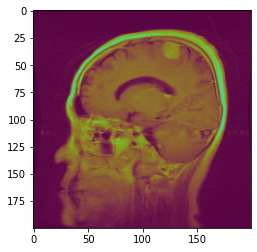

In [4]:
# Visualize an image

im1 = cv2.imread(os.path.join(path_1, os.listdir(path_1)[0]))
plt.imshow(cv2.resize(im1, (200, 200)))
plt.show()

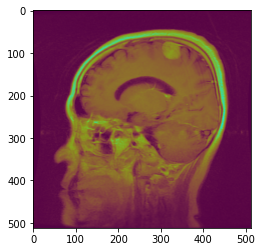

In [5]:
plt.imshow(cv2.imread(os.path.join(path_1, os.listdir(path_1)[0])))
plt.show()

In [6]:
cv2.imread(os.path.join(path_1, os.listdir(path_1)[0])).shape[:2]

(512, 512)

## Building the *dataframe*

To allow us to manipulate images easily, we gather their information in a dataframe, where it will be easier to access each image's information such as its directory.

In [6]:
clases = ['1','2','3']

In [7]:
print(os.path.join('data', '1'))

data/1


In [8]:
df = make_df(clases)

In [9]:
df.head()

,image,Size,label
1,data/1/2431.png,"(512, 512)",1
2,data/1/2849.png,"(512, 512)",1
3,data/1/2699.png,"(512, 512)",1
4,data/1/2682.png,"(512, 512)",1
5,data/1/2421.png,"(512, 512)",1


In [10]:
for i in clases:
  j = os.path.join('data', i)
  print(len(os.listdir(j)))

708
1426
930


We check the average size of the images to favor a vertical or horizontal reescaling, depending on which one provides a better model.

In [14]:
size_1 = []
size_2 = []
for s in df.Size:
  size_1.append(s[0])
  size_2.append(s[1])

np.array(size_1).mean(), np.array(size_2).mean()
# size_1.mean(), size_2.mean()
 

(510.7467362924282, 510.7467362924282)

As the images are squared, there is no need to favor any dimension.

# Data Generator

In [11]:
g = generator(df = shuffle(df, random_state = 42), im_size = (200, 200), batch_size = 3)

In [12]:
g = generator(df, (300, 300), batch_size = 1)

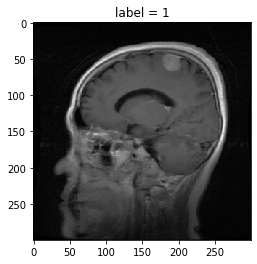

In [13]:
g.view_image(1)

In [18]:
tensor, label = g.__getitem__(1)

2022-05-30 19:07:57.607657: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-30 19:07:57.607701: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alejandro-GS65-Stealth-Thin-8RE): /proc/driver/nvidia/version does not exist
2022-05-30 19:07:57.609261: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# Check the label format
label

<tf.Tensor: shape=(1, 3), dtype=float16, numpy=array([[1., 0., 0.]], dtype=float16)>

# IA Model

We are going to implement a CNN with the *Categorical Cross-Entropy* loss function, sutiable for multiclass classification.

We define the training, validation and testing sets

In [14]:
df_train, df_val, df_test = train_val_test(df)

## Model 1

In [15]:
# Define 
im_shape = (300, 300, 3)
im_size = (300, 300)

In [16]:
# Define and compile the model
model = cnn_1(input_shape = (300, 300, 1))

Compilando modelo...
¡Modelo compilado!


2022-05-31 13:26:41.038896: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-31 13:26:41.038929: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alejandro-GS65-Stealth-Thin-8RE): /proc/driver/nvidia/version does not exist
2022-05-31 13:26:41.039451: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# We train the model
start_time = time.time()
history = train_model(model, df_train = df_train, df_val = df_val, im_size = (300, 300), explore_lr = True)

lapse = time.time() - start_time

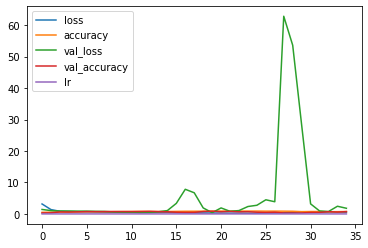

In [ ]:
# Graficamos las variables (loss, accuracy, val_loss, val_accuracy y lr) en función de las "epochs"
pd.DataFrame(history.history).plot()

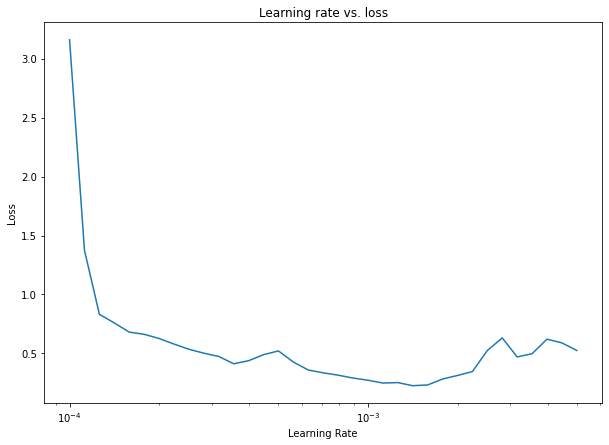

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(35)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

El gráfico anterior representa el coste del aprendizaje en función del ratio de aprendizaje. El pendiente más pronunciado (de forma negativa) es nuestro ratio de aprendizaje ideal, en este caso: 1e-4 o incluso 1e-5

In [20]:
model.evaluate(generator(df = df_test, im_size = (300, 300), batch_size = 32))

15/15 [==============================] - 8s 503ms/step - loss: 1.1061 - accuracy: 0.2304


[1.1061139106750488, 0.23043477535247803]

In [ ]:
model.history

In [ ]:
print('El entrenamiento ha tomado {} minutos'.format(round(lapse/60)))

El entrenamiento ha tomado 59 minutos


In [ ]:
os.getcwd()

'/content'

In [ ]:
from datetime import date

In [ ]:
today = date.today()

print(str(today))

2021-08-21


Los pesos que vamos a guardar se han parametrizado entrenando la red neuronal utlizando el optimizador Adam con un ratio de aprendizaje de 1e-5.

In [ ]:
# def guardar_pesos(modelo):
#   from datetime import time
#   modelo.save_weights('drive/MyDrive/Proyectos/TFM - Lorena/cnn_weights_'+str(date.today())+'.hdf5')

# guardar_pesos(modelo)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 300, 300, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 720000)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               184320

# Matriz de confusión

La función que utilizamos para representar la matriz de confusión está definida en la última celda de código

In [17]:
# path of the weights
weights_path = "cnn_weights_2022-05-31.hdf5"

#weights = os.path.join(weights_path,'cnn_weights_2022-05-31.hdf5')

In [18]:
# we load the weights
model.load_weights(weights_path)

In [19]:
# We instantiate the generator
test_generator = generator(batch_size = 32, df = df_test, im_size = (300, 300))

In [21]:
# We make the predictions
y_preds = model.predict(test_generator)

 1/15 [=>............................] - ETA: 11s

2022-05-31 13:29:04.446806: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 368640000 exceeds 10% of free system memory.


 2/15 [===>..........................] - ETA: 6s 

2022-05-31 13:29:04.912508: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 368640000 exceeds 10% of free system memory.


 3/15 [=====>........................] - ETA: 5s

2022-05-31 13:29:05.375092: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 368640000 exceeds 10% of free system memory.


 4/15 [=======>......................] - ETA: 5s

2022-05-31 13:29:05.839504: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 368640000 exceeds 10% of free system memory.


 5/15 [=========>....................] - ETA: 4s

2022-05-31 13:29:06.272457: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 368640000 exceeds 10% of free system memory.


15/15 [==============================] - 7s 413ms/step


To be able to represent the classes in a confusion matrix, it has to receive the data as categories and not as one-hot vectors as they have been represented to train. That means:

* [1, 0, 0] = 1

* [0, 1, 0] = 2

* [0, 0, 1] = 3

In [23]:
# We binarize the vectors with the tensorflow funcion "round()"
y_pred = np.array([i+1 for i in np.argmax(y_preds, axis = 1)]) # We add 1 to each element since argmax starts at 0
y_true = np.array([int(i) for i in df_test.label])

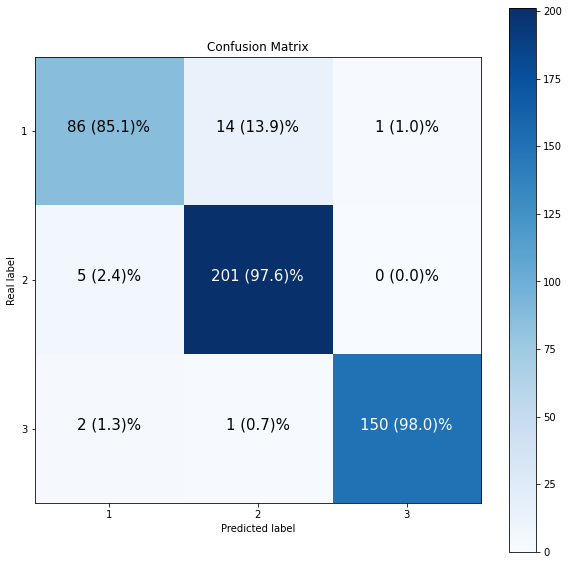

In [25]:
clases = [1,2,3]
pretty_confusion_matrix(y_true = y_true, y_pred = y_pred, classes = clases)

The greatest percentage of error is located in the classification of the class 1. We can check the number of images that have been used in the training process.

In [27]:
df_train.label.value_counts()

2    1007
3     645
1     492
Name: label, dtype: int64

As suspected, the class 1 has a lower number of elements in the training set.

In [37]:
# We check the percentage that represents each class in the training and test sets
porcentajes_train = pd.DataFrame(df_train.label.value_counts(normalize = True)*100)
porcentajes_test = pd.DataFrame(df_test.label.value_counts(normalize = True)*100)

# We check how much the class percentages differ with each other
np.abs(porcentajes_train-porcentajes_test)

,label
2,2.185675
3,3.176914
1,0.991239


Since the differences between the sets is pretty low, the difficulty in correctly classifying class 1 can be attributed to the low presence of class 1 in the training set.

# Next Steps

Even though the precision is pretty high with this model, it is not good enough for the health dominion. To further improve our model, the following aspects should be considered:

* Hyperparameter fine tuning:
    * Learning Rate
    * Toying with optimizers and their momentum
    * Number of epochs
    * Batch Size
* Modify the Neural Network architecture
    * Add Convolutional Layers
    * Modify the number/size of the filters that are being applied to the image
    * Try different non linear activation functions. Such as: LeakyReLU, GeLU, ...
